<h3>Step 1: Creating a graph in DGL</h3>

In [1]:
import dgl
import numpy as np

Using backend: pytorch


In [2]:
def build_karate_club_graph():
    # All 78 edges are stored in two numpy arrays. One for source endpoints
    # while the other for destination endpoints.
    src = np.array([1, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 9, 10, 10,
        10, 11, 12, 12, 13, 13, 13, 13, 16, 16, 17, 17, 19, 19, 21, 21,
        25, 25, 27, 27, 27, 28, 29, 29, 30, 30, 31, 31, 31, 31, 32, 32,
        32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33,
        33, 33, 33, 33, 33, 33, 33, 33, 33, 33])
    dst = np.array([0, 0, 1, 0, 1, 2, 0, 0, 0, 4, 5, 0, 1, 2, 3, 0, 2, 2, 0, 4,
        5, 0, 0, 3, 0, 1, 2, 3, 5, 6, 0, 1, 0, 1, 0, 1, 23, 24, 2, 23,
        24, 2, 23, 26, 1, 8, 0, 24, 25, 28, 2, 8, 14, 15, 18, 20, 22, 23,
        29, 30, 31, 8, 9, 13, 14, 15, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30,
        31, 32])
    # Edges are directional in DGL; Make them bi-directional.
    u = np.concatenate([src, dst])
    v = np.concatenate([dst, src])
    # Construct a DGLGraph
    return dgl.DGLGraph((u, v))

In [3]:
###############################################################################
# Print out the number of nodes and edges in our newly constructed graph:

G = build_karate_club_graph()
print('We have %d nodes.' % G.number_of_nodes())
print('We have %d edges.' % G.number_of_edges())

We have 34 nodes.
We have 156 edges.


C:\Users\ME\Anaconda3\envs\tf-gpu5\lib\site-packages\dgl\base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


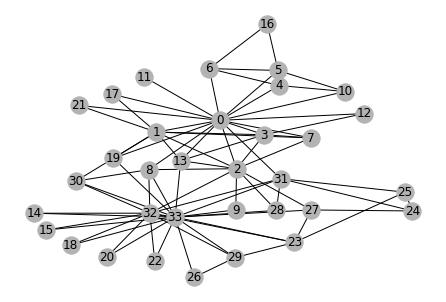

In [4]:
###############################################################################
# Visualize the graph by converting it to a `networkx
# <https://networkx.github.io/documentation/stable/>`_ graph:

import networkx as nx
# Since the actual graph is undirected, we convert it for visualization
# purpose.
nx_G = G.to_networkx().to_undirected()
# Kamada-Kawaii layout usually looks pretty for arbitrary graphs
pos = nx.kamada_kawai_layout(nx_G)
nx.draw(nx_G, pos, with_labels=True, node_color=[[.7, .7, .7]])

<h3>Step 2: Assign features to nodes or edges</h3>
Graph neural networks associate features with nodes and edges for training. For our classification example, since there is no input feature, we assign each node with a learnable embedding vector.

#In DGL, you can add features for all nodes at once, using a feature tensor that batches node features along the first dimension. The code below adds the learnable embeddings for all nodes:

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

embed = nn.Embedding(34, 5)  # 34 nodes with embedding dim equal to 5
G.ndata['feat'] = embed.weight

In [7]:
embed.weight

Parameter containing:
tensor([[ 0.4534, -0.0505,  1.7199, -1.3593,  0.2263],
        [ 0.4040, -1.1081,  1.0337, -0.3296,  1.1326],
        [ 0.8505,  0.5028, -0.9993, -0.6796, -0.9029],
        [-1.1243, -1.2964,  1.1125, -2.2126, -0.9404],
        [-0.9623,  0.5263, -0.8323,  0.6516, -2.7645],
        [ 0.8781, -2.3712,  0.8627,  0.8007, -1.1916],
        [-0.1318,  0.3101,  2.7588, -0.1640,  0.9478],
        [-0.5201,  1.9300,  0.9780,  0.7235,  0.7802],
        [-1.2888, -0.7610,  0.3525, -0.6685, -2.0240],
        [-0.3566, -0.2487,  0.4739, -0.2484,  0.0773],
        [-0.9018,  0.9305, -1.2564,  0.1136,  1.4761],
        [ 0.4331, -0.4106, -0.3982,  0.5984, -1.8016],
        [-1.3568,  0.3302, -2.3445,  1.1201, -0.0085],
        [ 0.9733,  0.3966, -2.1022, -0.6093,  0.0575],
        [ 0.0410, -0.1477, -0.7266,  0.9553, -0.5676],
        [-1.2298, -0.0450,  0.9424, -0.8813, -1.6350],
        [-1.2106,  1.0019, -0.3133, -1.5384, -0.8228],
        [-0.2094,  0.6312, -0.7865,  0.0460

In [6]:
############################################################
# Print out the node features to verify:

# print out node 2's input feature
print(G.ndata['feat'][2])

# print out node 10 and 11's input features
print(G.ndata['feat'][[10, 11]])

#############################################################

tensor([ 0.9848, -1.8627,  0.1619,  0.0450,  0.1491], grad_fn=<SelectBackward>)
tensor([[-0.0597, -1.5606, -0.9394,  2.5171,  1.9858],
        [-1.2771,  0.1081,  0.6126,  0.0507, -0.5347]],
       grad_fn=<IndexBackward>)


In [19]:
dir(G.ndata)

['_MutableMapping__marker',
 '__abstractmethods__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_abc_impl',
 '_graph',
 '_nodes',
 '_ntid',
 '_ntype',
 'clear',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [16]:
G.ndata.items()

ItemsView({'feat': Parameter containing:
tensor([[ 7.4523e-01, -2.5286e-01, -1.6342e+00, -5.3998e-01, -1.0087e+00],
        [-1.3321e+00, -1.3105e+00, -8.5714e-01, -3.1990e-02, -3.4511e-01],
        [ 9.8485e-01, -1.8627e+00,  1.6185e-01,  4.5036e-02,  1.4908e-01],
        [ 6.6687e-01,  1.4988e+00,  6.7064e-01, -5.8638e-01,  4.4804e-01],
        [-4.9790e-01, -2.0176e-01,  1.1561e+00,  1.0426e+00, -4.9678e-01],
        [ 3.1964e-01,  3.9392e-01,  1.0493e+00, -2.6354e+00, -7.3014e-01],
        [-8.7660e-01, -8.3057e-01, -7.8722e-01, -8.7480e-01,  1.4632e-01],
        [ 1.6951e+00, -7.0408e-01, -9.0752e-01,  1.5805e-01,  2.5434e+00],
        [ 7.1774e-01,  1.5907e-01,  7.4299e-01,  5.8117e-01,  3.9879e-02],
        [ 1.2964e+00,  3.7996e-01,  7.8453e-01,  9.1889e-01, -1.1799e+00],
        [-5.9726e-02, -1.5606e+00, -9.3943e-01,  2.5171e+00,  1.9858e+00],
        [-1.2771e+00,  1.0807e-01,  6.1257e-01,  5.0689e-02, -5.3474e-01],
        [ 4.6370e-03,  7.9437e-01, -9.5644e-01, -1.2569e+00

<h3>Step 3: Define a Graph Convolutional Network (GCN)</h3>
To perform node classification, use the Graph Convolutional Network
(GCN) developed by `Kipf and Welling <https://arxiv.org/abs/1609.02907>`_. Here is the simplest definition of a GCN framework. We recommend that you 
read the original paper for more details.
- At layer :math:`l`, each node :math:`v_i^l` carries a feature vector :math:`h_i^l`.
- Each layer of the GCN tries to aggregate the features from :math:`u_i^{l}` where
  :math:`u_i`'s are neighborhood nodes to :math:`v` into the next layer representation at
 :math:`v_i^{l+1}`. This is followed by an affine transformation with some
  non-linearity.

 The above definition of GCN fits into a **message-passing** paradigm: Each node will update its own feature with information sent from neighboring nodes. A graphical demonstration is displayed below.
 .. image:: https://data.dgl.ai/tutorial/1_first/mailbox.png
   :alt: mailbox
   :align: center
 In DGL, we provide implementations of popular Graph Neural Network layers under the `dgl.<backend>.nn` subpackage. The class:`~dgl.nn.pytorch.GraphConv` module implements one Graph Convolutional layer.

In [20]:
from dgl.nn.pytorch import GraphConv

###############################################################################
# Define a deeper GCN model that contains two GCN layers:

class GCN(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GraphConv(in_feats, hidden_size)
        self.conv2 = GraphConv(hidden_size, num_classes)

    def forward(self, g, inputs):
        h = self.conv1(g, inputs)
        h = torch.relu(h)
        h = self.conv2(g, h)
        return h

# The first layer transforms input features of size of 5 to a hidden size of 5.
# The second layer transforms the hidden layer and produces output features of
# size 2, corresponding to the two groups of the karate club.
net = GCN(5, 5, 2)

<h3>Step 4: Data preparation and initialization</h3>
We use learnable embeddings to initialize the node features. Since this is a semi-supervised setting, only the instructor (node 0) and the club president (node 33) are assigned labels. The implementation is available as follow.



In [21]:
inputs = embed.weight
labeled_nodes = torch.tensor([0, 33])  # only the instructor and the president nodes are labeled
labels = torch.tensor([0, 1])  # their labels are different

In [25]:
labels

tensor([0, 1])

<h3>Step 5: Train then visualize</h3>
The training loop is exactly the same as other PyTorch models.
We (1) create an optimizer, (2) feed the inputs to the model,
(3) calculate the loss and (4) use autograd to optimize the model.

In [26]:
import itertools

optimizer = torch.optim.Adam(itertools.chain(net.parameters(), embed.parameters()), lr=0.01)
all_logits = []
for epoch in range(50):
    logits = net(G, inputs)
    # we save the logits for visualization later
    all_logits.append(logits.detach())
    logp = F.log_softmax(logits, 1)
    # we only compute loss for labeled nodes
    loss = F.nll_loss(logp[labeled_nodes], labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print('Epoch %d | Loss: %.4f' % (epoch, loss.item()))

Epoch 0 | Loss: 0.6457
Epoch 1 | Loss: 0.6020
Epoch 2 | Loss: 0.5635
Epoch 3 | Loss: 0.5289
Epoch 4 | Loss: 0.4968
Epoch 5 | Loss: 0.4670
Epoch 6 | Loss: 0.4389
Epoch 7 | Loss: 0.4129
Epoch 8 | Loss: 0.3879
Epoch 9 | Loss: 0.3636
Epoch 10 | Loss: 0.3401
Epoch 11 | Loss: 0.3176
Epoch 12 | Loss: 0.2953
Epoch 13 | Loss: 0.2737
Epoch 14 | Loss: 0.2525
Epoch 15 | Loss: 0.2321
Epoch 16 | Loss: 0.2125
Epoch 17 | Loss: 0.1937
Epoch 18 | Loss: 0.1759
Epoch 19 | Loss: 0.1593
Epoch 20 | Loss: 0.1437
Epoch 21 | Loss: 0.1292
Epoch 22 | Loss: 0.1156
Epoch 23 | Loss: 0.1032
Epoch 24 | Loss: 0.0919
Epoch 25 | Loss: 0.0817
Epoch 26 | Loss: 0.0726
Epoch 27 | Loss: 0.0644
Epoch 28 | Loss: 0.0571
Epoch 29 | Loss: 0.0506
Epoch 30 | Loss: 0.0449
Epoch 31 | Loss: 0.0399
Epoch 32 | Loss: 0.0355
Epoch 33 | Loss: 0.0314
Epoch 34 | Loss: 0.0279
Epoch 35 | Loss: 0.0248
Epoch 36 | Loss: 0.0222
Epoch 37 | Loss: 0.0199
Epoch 38 | Loss: 0.0178
Epoch 39 | Loss: 0.0161
Epoch 40 | Loss: 0.0145
Epoch 41 | Loss: 0.0131
Ep

In [40]:
all_logits[-1]

tensor([[ 2.2027, -2.7183],
        [ 1.3652, -1.8020],
        [ 0.0415,  1.0306],
        [ 1.1272, -1.1754],
        [ 0.4518, -0.7563],
        [ 0.5652, -1.1868],
        [ 1.8376, -2.5486],
        [ 1.1166, -0.9722],
        [-0.2037,  1.2471],
        [ 0.1441,  0.5986],
        [ 1.9211, -2.3287],
        [ 0.4593, -0.4255],
        [ 0.8089, -1.0184],
        [ 0.8713, -0.4027],
        [-0.6640,  1.9941],
        [-0.6640,  1.9941],
        [ 1.1676, -1.5808],
        [ 0.7823, -0.5507],
        [-0.6640,  1.9941],
        [ 0.4764,  0.1509],
        [-0.6640,  1.9941],
        [ 0.7823, -0.5507],
        [-0.6640,  1.9941],
        [-1.4641,  3.5456],
        [-0.9891,  3.0832],
        [ 0.2360,  1.4003],
        [-0.5572,  1.0053],
        [ 0.2688,  1.3092],
        [ 0.1388,  0.8882],
        [-0.9335,  2.9998],
        [-0.3001,  1.6102],
        [-0.6961,  2.9460],
        [-1.3424,  2.3484],
        [-1.7213,  3.3458]])

In [41]:
logp

tensor([[-0.0073, -4.9282],
        [-0.0413, -3.2085],
        [-1.3053, -0.3162],
        [-0.0953, -2.3979],
        [-0.2614, -1.4695],
        [-0.1599, -1.9119],
        [-0.0124, -4.3986],
        [-0.1167, -2.2056],
        [-1.6614, -0.2106],
        [-0.9460, -0.4915],
        [-0.0142, -4.2640],
        [-0.3456, -1.2303],
        [-0.1492, -1.9764],
        [-0.2466, -1.5206],
        [-2.7258, -0.0677],
        [-2.7258, -0.0677],
        [-0.0621, -2.8104],
        [-0.2340, -1.5670],
        [-2.7258, -0.0677],
        [-0.5436, -0.8691],
        [-2.7258, -0.0677],
        [-0.2340, -1.5670],
        [-2.7258, -0.0677],
        [-5.0163, -0.0067],
        [-4.0892, -0.0169],
        [-1.4360, -0.2717],
        [-1.7528, -0.1903],
        [-1.3430, -0.3026],
        [-1.1364, -0.3871],
        [-3.9527, -0.0194],
        [-2.0484, -0.1381],
        [-3.6680, -0.0259],
        [-3.7154, -0.0246],
        [-5.0734, -0.0063]], grad_fn=<LogSoftmaxBackward>)

 This is a rather toy example, so it does not even have a validation or test set. Instead, Since the model produces an output feature of size 2 for each node, we can visualize by plotting the output feature in a 2D space.The following code animates the training process from initial guess (where the nodes are not classified correctly at all) to the end
(where the nodes are linearly separable).

In [32]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt

def draw(i):
    cls1color = '#00FFFF'
    cls2color = '#FF00FF'
    pos = {}
    colors = []
    for v in range(34):
        pos[v] = all_logits[i][v].numpy()
        cls = pos[v].argmax()
        colors.append(cls1color if cls else cls2color)
    ax.cla()
    ax.axis('off')
    ax.set_title('Epoch: %d' % i)
    nx.draw_networkx(nx_G.to_undirected(), pos, node_color=colors,
            with_labels=True, node_size=300, ax=ax)

fig = plt.figure(dpi=150)
fig.clf()
ax = fig.subplots()
draw(0)  # draw the prediction of the first epoch
plt.close()

In [30]:
ani = animation.FuncAnimation(fig, draw, frames=len(all_logits), interval=200)

In [31]:
draw(49)

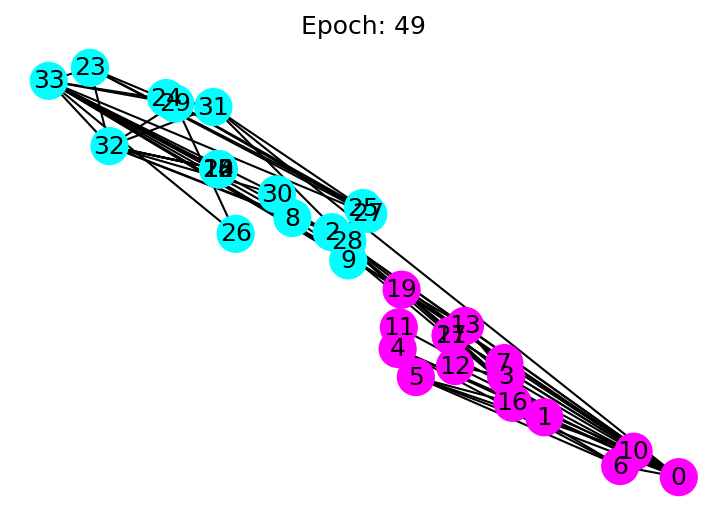

In [37]:
cls1color = '#00FFFF'
cls2color = '#FF00FF'
i = 0
pos = {}
colors = []
for v in range(34):
    pos[v] = all_logits[i][v].numpy()
    cls = pos[v].argmax()
    colors.append(cls1color if cls else cls2color)
ax.cla()
ax.axis('off')
ax.set_title('Epoch: %d' % i)
nx.draw_networkx(nx_G.to_undirected(), pos, node_color=colors,
        with_labels=True, node_size=300, ax=ax)

fig = plt.figure(dpi=150)
fig.clf()
ax = fig.subplots()
draw(49)  # draw the prediction of the first epoch
